In [56]:
# 라이브러리
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [57]:
spam_df = pd.read_csv('emails.csv')
spam_df

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
...,...,...
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0


In [58]:
spam_df.describe()
# => mean을 통해 23%가 스팸인걸 알 수 있음

,spam
count,5728.000000
mean,0.238827
std,0.426404
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [59]:
spam_df.info()
# 모든게 다 non-null임을 알 수 있음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5728 non-null   object
 1   spam    5728 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 89.6+ KB


## 데이터 시각화

In [60]:
ham = spam_df[spam_df['spam']==0]
ham

,text,spam
1368,"Subject: hello guys , i ' m "" bugging you "" f...",0
1369,Subject: sacramento weather station fyi - - ...,0
1370,Subject: from the enron india newsdesk - jan 1...,0
1371,Subject: re : powerisk 2001 - your invitation ...,0
1372,Subject: re : resco database and customer capt...,0
...,...,...
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0


In [61]:
spam = spam_df[spam_df['spam']==1]
spam

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
...,...,...
1363,Subject: are you ready to get it ? hello ! v...,1
1364,Subject: would you like a $ 250 gas card ? do...,1
1365,"Subject: immediate reply needed dear sir , i...",1
1366,Subject: wanna see me get fisted ? fist bang...,1


In [62]:
print('spam percentage: ', spam_df['spam'].mean()*100,'%')

spam percentage:  23.88268156424581 %


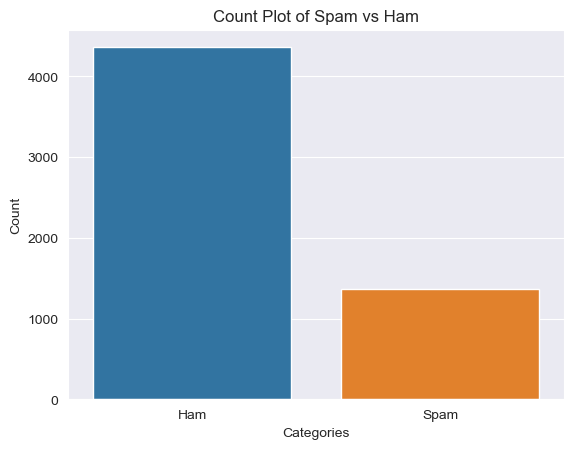

<Figure size 640x480 with 0 Axes>

In [63]:
sns.countplot(x='spam', data=spam_df)
plt.title('Count Plot of Spam vs Ham')
plt.xlabel('Categories')
plt.ylabel('Count')
plt.xticks([0, 1], ['Ham', 'Spam'])  # x축 레이블 지정
plt.show()
plt.clf()  # 그래프 정리
# plt.clf 함수는 현재 활성화된 그래프를 정리(clear)합니다. clear figure의 약자
# 이것은 특히 Jupyter Notebook 같은 인터랙티브 환경에서 그래프가 중첩되는 것을 방지하기 위해 사용됩니다. 
# 새로운 그래프를 그리기 전에 현재 그래프를 초기화하는 데 유용합니다.

In [64]:
## 카운터 벡터화
# 간단한 예제
from sklearn.feature_extraction.text import CountVectorizer

In [65]:
vectorizer = CountVectorizer()

spamham_countvectorizer = vectorizer.fit_transform(spam_df['text'])

In [66]:
print(vectorizer.get_feature_names_out())  # text에 있는 모든 단어가 토큰화 되서 나옴

['00' '000' '0000' ... 'zzn' 'zzncacst' 'zzzz']


In [67]:
print(spamham_countvectorizer.toarray()) # 저 토큰이 몇개나 나왔는지 

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [4 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [68]:
spamham_countvectorizer.shape 
# 37000개의 단어, 5000개의 

(5728, 37303)

## 모델 훈련

In [69]:
label = spam_df['spam'].values
label

array([1, 1, 1, ..., 0, 0, 0])

In [70]:
from sklearn.naive_bayes import MultinomialNB

NB_classifier = MultinomialNB()
NB_classifier.fit(spamham_countvectorizer, label)

MultinomialNB()

In [71]:
testing_sample =['Free money','Hi kimm give me the id for your imformation']
# 얘를 또 countvectorizer 에 넣어줘야함

testing_sample_countvector = vectorizer.transform(testing_sample)
print(testing_sample_countvector)

  (0, 15245)	1
  (0, 22785)	1
  (1, 15009)	1
  (1, 15916)	1
  (1, 17058)	1
  (1, 17659)	1
  (1, 22000)	1
  (1, 33450)	1
  (1, 37024)	1


In [72]:
test_predict = NB_classifier.predict(testing_sample_countvector)
test_predict

array([1, 0])

In [73]:
X = spamham_countvectorizer
y = label

In [74]:
X.shape

(5728, 37303)

In [75]:
y.shape

(5728,)

In [76]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [77]:
NB_classifier2 = MultinomialNB()
NB_classifier2.fit(X_train,y_train)

MultinomialNB()

In [78]:
from sklearn.metrics import classification_report,confusion_matrix

In [79]:
y_prediction_train = NB_classifier2.predict(X_train)
y_prediction_train

array([1, 0, 0, ..., 0, 0, 0])

<Axes: >

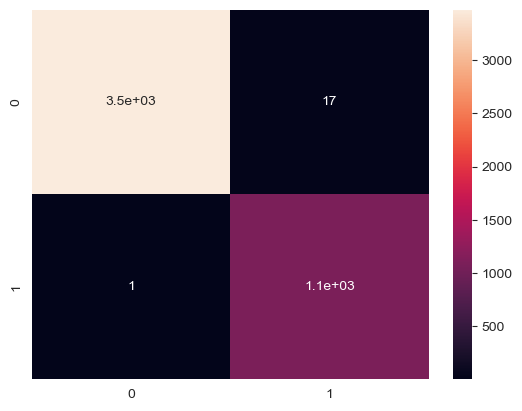

In [80]:
cm = confusion_matrix(y_train, y_prediction_train)
sns.heatmap(cm, annot =True)

In [81]:
y_prediction_test = NB_classifier2.predict(X_test)
y_prediction_test

array([0, 0, 0, ..., 0, 0, 0])

<Axes: >

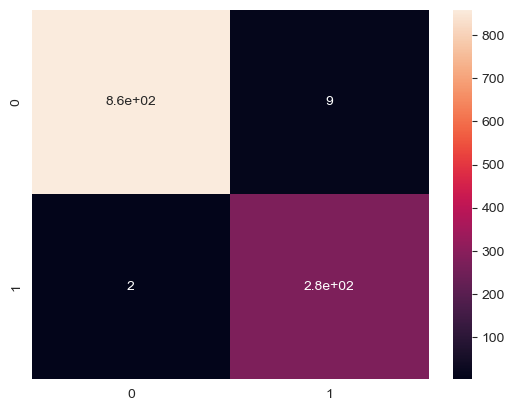

In [82]:
cm = confusion_matrix(y_test, y_prediction_test)
sns.heatmap(cm, annot =True)

In [83]:
# classification report 확인해보기
print(classification_report(y_test,y_prediction_test))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       868
           1       0.97      0.99      0.98       278

    accuracy                           0.99      1146
   macro avg       0.98      0.99      0.99      1146
weighted avg       0.99      0.99      0.99      1146
